<a href="https://colab.research.google.com/github/wkdtjrrb/SPIDER/blob/main/projec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/TeamSpider/Project'

/content/drive/MyDrive/TeamSpider/Project


In [4]:
path = './최종최종.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
df = pd.read_csv(path)

In [6]:
df.isnull().sum()

상태                0
주유소명              0
주소                0
도로 번호             0
2021년 교통량(양방)     0
2020년 교통량(양방)     0
2019년 교통량(양방)     0
2018년 교통량(양방)     0
2017년 교통량(양방)    23
휘발유_2020          7
경유_2020           7
휘발유_2021          7
경유_2021           7
실내등유 판매 여부        6
고급휘발유 판매 여부       6
셀프                6
24시간              6
세차장               6
편의점               6
경정비               6
알뜰주유소             4
토양안심주유소           0
dtype: int64

In [7]:
#주유소명 중복값 삭제
df.drop_duplicates(subset=['주유소명'], inplace=True)
#판매가가 없는 행 삭제
to_remove = ['서강주유소','삼융주유소','(주)미래아스팔트신우주유소','SK네트웍스(주)삼성주유소','SK네트웍스(주)동우주유소']
df = df[~df['주유소명'].isin(to_remove)]

In [8]:
df.isnull().sum()

상태                0
주유소명              0
주소                0
도로 번호             0
2021년 교통량(양방)     0
2020년 교통량(양방)     0
2019년 교통량(양방)     0
2018년 교통량(양방)     0
2017년 교통량(양방)    21
휘발유_2020          1
경유_2020           1
휘발유_2021          1
경유_2021           1
실내등유 판매 여부        0
고급휘발유 판매 여부       0
셀프                0
24시간              0
세차장               0
편의점               0
경정비               0
알뜰주유소             0
토양안심주유소           0
dtype: int64

In [9]:
df['상태'].value_counts()

영업중    436
폐업      36
휴업      29
Name: 상태, dtype: int64

In [10]:
#교통량의 ,를 지우고 numerical type으로 변환
df['2017년 교통량(양방)'] = df['2017년 교통량(양방)'].str.replace(',', '')
df['2017년 교통량(양방)'] = pd.to_numeric(df['2017년 교통량(양방)'], errors='coerce').astype('Int64')
df['2018년 교통량(양방)'] = df['2018년 교통량(양방)'].str.replace(',', '')
df['2018년 교통량(양방)'] = pd.to_numeric(df['2018년 교통량(양방)'], errors='coerce').astype('Int64')
df['2019년 교통량(양방)'] = df['2019년 교통량(양방)'].str.replace(',', '')
df['2019년 교통량(양방)'] = pd.to_numeric(df['2019년 교통량(양방)'], errors='coerce').astype('Int64')
df['2021년 교통량(양방)'] = df['2021년 교통량(양방)'].str.replace(',', '')
df['2021년 교통량(양방)'] = pd.to_numeric(df['2021년 교통량(양방)'], errors='coerce').astype('Int64')
df.dtypes

상태                object
주유소명              object
주소                object
도로 번호             object
2021년 교통량(양방)      Int64
2020년 교통량(양방)      int64
2019년 교통량(양방)      Int64
2018년 교통량(양방)      Int64
2017년 교통량(양방)      Int64
휘발유_2020         float64
경유_2020          float64
휘발유_2021         float64
경유_2021          float64
실내등유 판매 여부       float64
고급휘발유 판매 여부      float64
셀프                object
24시간              object
세차장               object
편의점               object
경정비               object
알뜰주유소             object
토양안심주유소           object
dtype: object

In [11]:
df.dtypes

상태                object
주유소명              object
주소                object
도로 번호             object
2021년 교통량(양방)      Int64
2020년 교통량(양방)      int64
2019년 교통량(양방)      Int64
2018년 교통량(양방)      Int64
2017년 교통량(양방)      Int64
휘발유_2020         float64
경유_2020          float64
휘발유_2021         float64
경유_2021          float64
실내등유 판매 여부       float64
고급휘발유 판매 여부      float64
셀프                object
24시간              object
세차장               object
편의점               object
경정비               object
알뜰주유소             object
토양안심주유소           object
dtype: object

In [12]:
#교통량 결측값 처리 : 같은 주소 = 같은 교통량
df['주소'] = df['주소'].str.split().str[1:2].str.join(' ')
df['2017년 교통량(양방)'] = df.groupby('주소')['2017년 교통량(양방)'].transform(lambda x: x.fillna(x.mean().round()))

In [13]:
df.columns

Index(['상태', '주유소명', '주소', '도로 번호', '2021년 교통량(양방)', '2020년 교통량(양방)',
       '2019년 교통량(양방)', '2018년 교통량(양방)', '2017년 교통량(양방)', '휘발유_2020',
       '경유_2020', '휘발유_2021', '경유_2021', '실내등유 판매 여부', '고급휘발유 판매 여부', '셀프',
       '24시간', '세차장', '편의점', '경정비', '알뜰주유소', '토양안심주유소'],
      dtype='object')

In [14]:
#결측값을 0으로 설정해둠(이후에 0인 데이터는 폐업이나 휴업으로 간주)
df['휘발유_2020'].fillna(0,inplace = True)
df['경유_2020'].fillna(0,inplace = True)
df['휘발유_2021'].fillna(0,inplace = True)
df['경유_2021'].fillna(0,inplace = True)

In [15]:
#영업중: 0 / 휴업,폐업 : 1
df.loc[df['상태'] == '영업중', '상태'] = 0
df.loc[df['상태'] ==  '휴업', '상태'] = 1
df.loc[df['상태'] == '폐업', '상태'] = 1

In [16]:
df['상태'].value_counts()

0    436
1     65
Name: 상태, dtype: int64

In [17]:
df.loc[df['주소'] == '강서로', '주소'] = '강서구'
df.loc[df['주소'] == '중랑구상봉로', '주소'] = '중랑구'
df.loc[df['주소'] == '성산로', '주소'] = '서대문구'
df.loc[df['주소'] == '통일로', '주소'] = '서대문구'
df.loc[df['주소'] == '모래내로', '주소'] = '서대문구'
df.loc[df['주소'] == '세검정로', '주소'] = '서대문구'
df.loc[df['주소'] == '연희로', '주소'] = '서대문구'
address_dict = {
    '강남구': 'Gangnam-gu',
    '서초구': 'Seocho-gu',
    '송파구': 'Songpa-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '강서구': 'Gangseo-gu',
    '양천구': 'Yangcheon-gu',
    '성북구': 'Seongbuk-gu',
    '동대문구': 'Dongdaemun-gu',
    '구로구': 'Guro-gu',
    '도봉구': 'Dobong-gu',
    '중랑구': 'Jungnang-gu',
    '광진구': 'Gwangjin-gu',
    '성동구': 'Seongdong-gu',
    '강동구': 'Gangdong-gu',
    '은평구': 'Eunpyeong-gu',
    '관악구': 'Gwanak-gu',
    '금천구': 'Geumcheon-gu',
    '노원구': 'Nowon-gu',
    '마포구': 'Mapo-gu',
    '서대문구': 'Seodaemun-gu',
    '용산구': 'Yongsan-gu',
    '강북구': 'Gangbuk-gu',
    '중구': 'Jung-gu',
    '동작구': 'Dongjak-gu',
    '종로구': 'Jongno-gu'
}

df['주소'] = df['주소'].map(address_dict)
df['주소'].value_counts()


Gangnam-gu         42
Seocho-gu          37
Songpa-gu          37
Yeongdeungpo-gu    32
Gangseo-gu         32
Yangcheon-gu       26
Seongbuk-gu        24
Dongdaemun-gu      22
Guro-gu            21
Dobong-gu          18
Jungnang-gu        18
Gwangjin-gu        17
Seongdong-gu       17
Gangdong-gu        16
Eunpyeong-gu       16
Gwanak-gu          15
Geumcheon-gu       15
Nowon-gu           15
Seodaemun-gu       14
Yongsan-gu         13
Mapo-gu            13
Gangbuk-gu         12
Jung-gu            10
Dongjak-gu         10
Jongno-gu           9
Name: 주소, dtype: int64

In [18]:
#구별 영업중 / 폐업,휴업 주유소 수
counts = df.groupby('주소')['상태'].value_counts().unstack().fillna(0)
counts.value_counts

<bound method DataFrame.value_counts of 상태                  0    1
주소                        
Dobong-gu        15.0  3.0
Dongdaemun-gu    18.0  4.0
Dongjak-gu        9.0  1.0
Eunpyeong-gu     16.0  0.0
Gangbuk-gu       10.0  2.0
Gangdong-gu      14.0  2.0
Gangnam-gu       34.0  8.0
Gangseo-gu       31.0  1.0
Geumcheon-gu     11.0  4.0
Guro-gu          18.0  3.0
Gwanak-gu        13.0  2.0
Gwangjin-gu      12.0  5.0
Jongno-gu         8.0  1.0
Jung-gu          10.0  0.0
Jungnang-gu      14.0  4.0
Mapo-gu          11.0  2.0
Nowon-gu         14.0  1.0
Seocho-gu        31.0  6.0
Seodaemun-gu     14.0  0.0
Seongbuk-gu      23.0  1.0
Seongdong-gu     17.0  0.0
Songpa-gu        32.0  5.0
Yangcheon-gu     24.0  2.0
Yeongdeungpo-gu  26.0  6.0
Yongsan-gu       11.0  2.0>

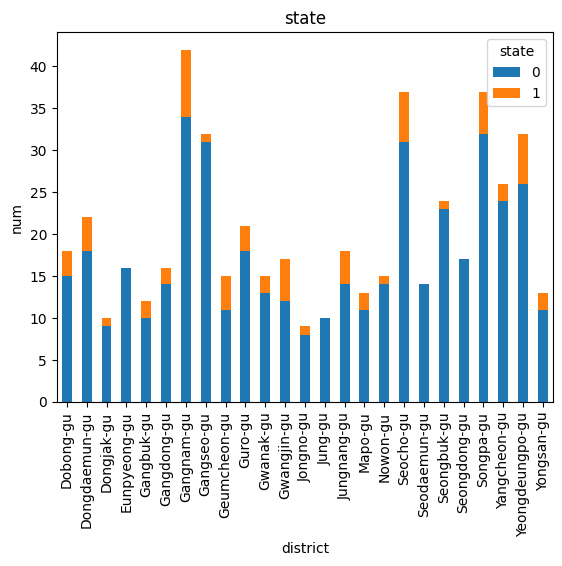

In [19]:
counts = df.groupby('주소')['상태'].value_counts().unstack().fillna(0)

# 그래프 표시
counts.plot(kind='bar', stacked=True)
plt.xlabel('district')
plt.ylabel('num')
plt.title('state')
plt.legend(title='state', loc='upper right')
plt.show()

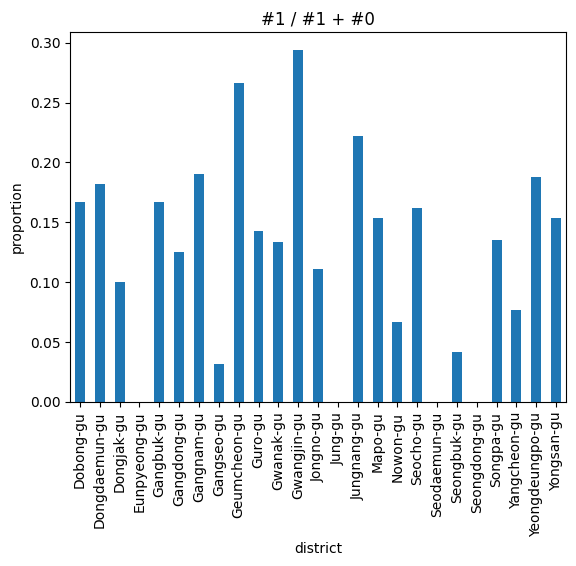

In [20]:
#지역별 폐업,휴업 비율을 새로운 열 proportion으로 정의
counts['proportion'] = counts[1] / (counts[0] + counts[1])
df = df.merge(counts['proportion'], left_on='주소', right_index=True, how='left')
# 그래프 표시
counts['proportion'].plot(kind='bar')
plt.xlabel('district')
plt.ylabel('proportion')
plt.title('#1 / #1 + #0')
plt.show()

In [21]:
#교통량은 평균 교통량으로 계산하여 지역별로 비교
#연도별 전체 교통량을 평균내서 새로운 열 traffic_mean으로 정의
traffic_volume2017 = df.groupby('주소')['2017년 교통량(양방)'].mean()
traffic_volume2018 = df.groupby('주소')['2018년 교통량(양방)'].mean()
traffic_volume2019 = df.groupby('주소')['2019년 교통량(양방)'].mean()
traffic_volume2020 = df.groupby('주소')['2020년 교통량(양방)'].mean()
traffic_volume2021 = df.groupby('주소')['2021년 교통량(양방)'].mean()
mean_traffic_volume = (traffic_volume2017 + traffic_volume2018 + traffic_volume2019 + traffic_volume2020 + traffic_volume2021) / 5
mean_traffic_volume.name = 'traffic_mean'
df = df.merge(mean_traffic_volume, left_on='주소', right_index=True, how='left')

<Axes: >

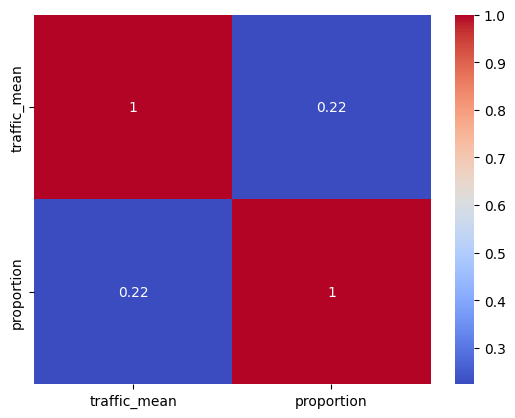

In [22]:
#교통량 별 영업 / 휴업,폐업 확인
merged_df = pd.concat([mean_traffic_volume, counts['proportion']], axis=1)

# 상관관계 계산
correlation = merged_df.corr()

# 상관관계를 히트맵으로 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [23]:
df.loc[df['셀프'] == 'Y', '셀프'] = '1'
df.loc[df['셀프'] == 'N', '셀프'] = '0'

df.loc[df['24시간'] == 'Y', '24시간'] = '1'
df.loc[df['24시간'] == 'N', '24시간'] = '0'

df.loc[df['세차장'] == 'Y', '세차장'] = '1'
df.loc[df['세차장'] == 'N', '세차장'] = '0'

df.loc[df['편의점'] == 'Y', '편의점'] = '1'
df.loc[df['편의점'] == 'N', '편의점'] = '0'

df.loc[df['경정비'] == 'Y', '경정비'] = '1'
df.loc[df['경정비'] == 'N', '경정비'] = '0'

df.loc[df['알뜰주유소'] == 'Y', '알뜰주유소'] = '1'
df.loc[df['알뜰주유소'] == 'N', '알뜰주유소'] = '0'

df.loc[df['토양안심주유소'] == 'Y', '토양안심주유소'] = '1'
df.loc[df['토양안심주유소'] == 'N', '토양안심주유소'] = '0'

In [24]:
df['토양안심주유소'].value_counts()

0    432
1     69
Name: 토양안심주유소, dtype: int64

In [25]:
df['알뜰주유소'].value_counts()

0    490
1     11
Name: 알뜰주유소, dtype: int64

In [26]:
#diff = (기름값) - (구별 평균 기름값)
diesel_2021 = df[df['경유_2021']!=0].groupby('주소')['경유_2021'].mean()
diesel_2021.name = 'diesel_2021'

gasoline_2021 = df[df['휘발유_2021']!=0].groupby('주소')['휘발유_2021'].mean()
gasoline_2021.name = 'gasoline_2021'

diesel_2020 = df[df['경유_2020']!=0].groupby('주소')['경유_2020'].mean()
diesel_2020.name = 'diesel_2020'

gasoline_2020 = df[df['휘발유_2020']!=0].groupby('주소')['휘발유_2020'].mean()
gasoline_2020.name = 'gasoline_2020'

In [27]:
diesel_diff = diesel_2021-diesel_2020
diesel_diff

주소
Dobong-gu          196.710717
Dongdaemun-gu      195.411728
Dongjak-gu         177.837417
Eunpyeong-gu       211.150722
Gangbuk-gu         205.854008
Gangdong-gu        208.291042
Gangnam-gu         165.552677
Gangseo-gu         209.825469
Geumcheon-gu       197.820455
Guro-gu            199.387351
Gwanak-gu          174.952747
Gwangjin-gu        196.975889
Jongno-gu          125.163942
Jung-gu            160.593000
Jungnang-gu        202.944620
Mapo-gu            144.036666
Nowon-gu           186.204055
Seocho-gu          152.135608
Seodaemun-gu       184.142789
Seongbuk-gu        223.059011
Seongdong-gu       192.027451
Songpa-gu          186.823768
Yangcheon-gu       206.450952
Yeongdeungpo-gu    157.359995
Yongsan-gu         116.886218
dtype: float64

In [28]:
gasoline_diff = gasoline_2021 - gasoline_2020
gasoline_diff

주소
Dobong-gu          204.742083
Dongdaemun-gu      201.706098
Dongjak-gu         204.830917
Eunpyeong-gu       217.962128
Gangbuk-gu         212.370357
Gangdong-gu        222.063438
Gangnam-gu         193.334936
Gangseo-gu         215.706068
Geumcheon-gu       199.818313
Guro-gu            202.530843
Gwanak-gu          197.563985
Gwangjin-gu        201.589391
Jongno-gu          156.235238
Jung-gu            159.277250
Jungnang-gu        211.796759
Mapo-gu            163.349263
Nowon-gu           194.023722
Seocho-gu          183.557473
Seodaemun-gu       188.228529
Seongbuk-gu        226.411267
Seongdong-gu       205.485990
Songpa-gu          201.102803
Yangcheon-gu       211.521964
Yeongdeungpo-gu    165.208923
Yongsan-gu         133.033654
dtype: float64

In [29]:
counts = df.groupby('주소')['traffic_mean'].value_counts()
counts.value_counts

<bound method IndexOpsMixin.value_counts of 주소               traffic_mean 
Dobong-gu        51094.6          18
Dongdaemun-gu    99886.527273     22
Dongjak-gu       99955.86         10
Eunpyeong-gu     44913.65         16
Gangbuk-gu       54377.583333     12
Gangdong-gu      102698.425       16
Gangnam-gu       83676.219048     42
Gangseo-gu       82391.9          32
Geumcheon-gu     76337.546667     15
Guro-gu          56283.095238     21
Gwanak-gu        56235.333333     15
Gwangjin-gu      81426.788235     17
Jongno-gu        47556.488889      9
Jung-gu          56434.08         10
Jungnang-gu      76260.044444     18
Mapo-gu          122625.630769    13
Nowon-gu         68423.813333     15
Seocho-gu        93837.081081     37
Seodaemun-gu     73948.057143     14
Seongbuk-gu      75732.575        24
Seongdong-gu     78997.870588     17
Songpa-gu        82076.378378     37
Yangcheon-gu     81352.338462     26
Yeongdeungpo-gu  73407.96875      32
Yongsan-gu       99658.076923     13


In [30]:
df['traffic_mean'].value_counts()

83676.219048     42
93837.081081     37
82076.378378     37
73407.96875      32
82391.9          32
81352.338462     26
75732.575        24
99886.527273     22
56283.095238     21
51094.6          18
76260.044444     18
81426.788235     17
78997.870588     17
102698.425       16
44913.65         16
56235.333333     15
76337.546667     15
68423.813333     15
73948.057143     14
99658.076923     13
122625.630769    13
54377.583333     12
56434.08         10
99955.86         10
47556.488889      9
Name: traffic_mean, dtype: Int64

In [31]:
df = df.merge(diesel_2021, on='주소', how='left')
df['diesel_2021_diff'] = df['경유_2021'] - df['diesel_2021']

df = df.merge(diesel_2020, on='주소', how='left')
df['diesel_2020_diff'] = df['경유_2020'] - df['diesel_2020']

df = df.merge(gasoline_2021, on='주소', how='left')
df['gasoline_2021_diff'] = df['휘발유_2021'] - df['gasoline_2021']

df = df.merge(gasoline_2020, on='주소', how='left')
df['gasoline_2020_diff'] = df['휘발유_2021'] - df['gasoline_2020']

In [32]:
df['상태'] = df['상태'].astype(int)
df['셀프'] = df['셀프'].astype(int)
df['24시간'] = df['24시간'].astype(int)
df['세차장'] = df['세차장'].astype(int)
df['편의점'] = df['편의점'].astype(int)
df['경정비'] = df['경정비'].astype(int)
df['알뜰주유소'] = df['알뜰주유소'].astype(int)
df['토양안심주유소'] = df['토양안심주유소'].astype(int)

In [33]:
df.drop('diesel_2020',axis = 1,inplace = True)
df.drop('diesel_2021',axis = 1,inplace = True)
df.drop('gasoline_2020',axis = 1,inplace = True)
df.drop('gasoline_2021',axis = 1,inplace = True)

In [34]:
df.rename(columns={'상태':'condition','2021년 교통량(양방)':'traffic_2021','주유소명':'name','주소':'address','도로 번호':'road_num','2020년 교통량(양방)':'traffic_2020','2019년 교통량(양방)':'traffic_2019','2018년 교통량(양방)':'traffic_2018','2017년 교통량(양방)':'traffic_2017'},inplace = True)
df.rename(columns={'경정비':'light_maintenance','알뜰주유소':'altteul','토양안심주유소':'toyang','세차장':'car_wash','편의점':'store','실내등유 판매 여부':'indoor_kerosene','고급휘발유 판매 여부':'premium_gasoline'},inplace = True)
df.rename(columns={'경유_2020':'diesel_2020','경유_2021':'diesel_2021','휘발유_2020':'gasoline_2020','휘발유_2021':'gasoline_2021','24시간':'24hours','셀프':'self'},inplace=True)

In [35]:
df.drop('proportion',axis = 1,inplace = True)

In [36]:
df.columns

Index(['condition', 'name', 'address', 'road_num', 'traffic_2021',
       'traffic_2020', 'traffic_2019', 'traffic_2018', 'traffic_2017',
       'gasoline_2020', 'diesel_2020', 'gasoline_2021', 'diesel_2021',
       'indoor_kerosene', 'premium_gasoline', 'self', '24hours', 'car_wash',
       'store', 'light_maintenance', 'altteul', 'toyang', 'traffic_mean',
       'diesel_2021_diff', 'diesel_2020_diff', 'gasoline_2021_diff',
       'gasoline_2020_diff'],
      dtype='object')

In [37]:
correlation = df.corr()
corr = correlation['condition'].abs().sort_values(ascending = False)
corr

<ipython-input-37-e7ce823eb04d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


condition             1.000000
car_wash              0.479716
light_maintenance     0.133369
24hours               0.117796
diesel_2020_diff      0.109384
toyang                0.085361
diesel_2020           0.080276
gasoline_2020         0.077255
store                 0.074507
indoor_kerosene       0.068761
gasoline_2020_diff    0.064836
altteul               0.057851
gasoline_2021_diff    0.056910
self                  0.053349
gasoline_2021         0.050745
diesel_2021_diff      0.048586
traffic_mean          0.047529
diesel_2021           0.044774
traffic_2021          0.023758
traffic_2020          0.018398
traffic_2019          0.013268
premium_gasoline      0.012878
traffic_2018          0.006938
traffic_2017          0.005589
Name: condition, dtype: float64

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


In [39]:
df.columns

Index(['condition', 'name', 'address', 'road_num', 'traffic_2021',
       'traffic_2020', 'traffic_2019', 'traffic_2018', 'traffic_2017',
       'gasoline_2020', 'diesel_2020', 'gasoline_2021', 'diesel_2021',
       'indoor_kerosene', 'premium_gasoline', 'self', '24hours', 'car_wash',
       'store', 'light_maintenance', 'altteul', 'toyang', 'traffic_mean',
       'diesel_2021_diff', 'diesel_2020_diff', 'gasoline_2021_diff',
       'gasoline_2020_diff'],
      dtype='object')

In [40]:
X = df.drop({'condition','name','address','road_num','diesel_2021_diff','traffic_mean','diesel_2021','traffic_2021','traffic_2020','traffic_2019','premium_gasoline','traffic_2018','traffic_2017','gasoline_2021_diff','self'},axis = 1)
y = df['condition']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
fold = 1
for train_index, val_index in skf.split(X, y):
    print(f"Fold: {fold}")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = LogisticRegression(penalty='l2')

    model.fit(X_train, y_train)

    # 회귀계수 출력
    coefficients = model.coef_
    print(f"Regression Coefficients: {coefficients}\n")

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # 임계값 조정
    threshold = 0.1  # 임계값 설정

    # 임계값을 기준으로 예측 클래스 결정
    y_pred = (y_pred_proba >= threshold).astype(int)

    # 오차 행렬 계산
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

    # 민감도와 특이도 계산
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

    accuracy = model.score(X_val, y_val)
    print(f"Accuracy: {accuracy}\n")

    fold += 1
mean_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
mean_specificity = sum(specificity_scores) / len(specificity_scores)

print(f"Mean Sensitivity: {mean_sensitivity}")
print(f"Mean Specificity: {mean_specificity}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Regression Coefficients: [[ 0.00813051 -0.01403093  0.00583646 -0.43094588 -0.03359407 -2.31404131
  -0.29353632 -0.31767349 -0.35621309 -0.31507284  0.01903165 -0.0198408 ]]

Accuracy: 0.8910891089108911

Fold: 2
Regression Coefficients: [[ 7.22311572e-04 -6.76559328e-03  6.03280364e-03 -3.53760717e-01
   3.92347437e-02 -2.55647315e+00 -2.18168825e-01 -5.81779357e-01
  -6.90935663e-02 -3.38586938e-01  1.37024370e-02 -1.30998421e-02]]

Accuracy: 0.91

Fold: 3
Regression Coefficients: [[ 0.00814689 -0.00339981 -0.00402641 -0.40125039 -0.65173153 -2.26858834
  -0.32779433 -0.64143638 -0.07855013 -0.276566    0.00524854 -0.00541002]]

Accuracy: 0.85

Fold: 4
Regression Coefficients: [[ 0.01504177 -0.01198604 -0.00296523 -0.4674816  -0.58782648 -2.25636887
  -0.25768638 -0.48964193 -0.09984025 -0.22094327  0.01036042 -0.01069944]]

Accuracy: 0.88

Fold: 5
Regression Coefficients: [[ 0.00781466 -0.00430475 -0.00294483 -0.41253909 -0.27110204 -2.00838116
  -0.19738807 -0.40830153 -0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
model.fit(X,y)
y_pred = model.predict(X)
probabilities = model.predict_proba(X)

indices_good = np.where((probabilities[:, 1] < 0.01))[0]
indices_interest = np.where((probabilities[:, 1] >= 0.4) & (probabilities[:, 1] < 0.5))[0]
indices_serious = np.where((probabilities[:, 1] >= 0.5) & (probabilities[:, 1] < 1))[0]
name_good = df.loc[(df['condition'] == 0) & (df.index.isin(indices_good)), 'name']
name_interest = df.loc[(df['condition'] == 0) & (df.index.isin(indices_interest)), 'name']
name_serious = df.loc[(df['condition'] == 0) & (df.index.isin(indices_serious)), 'name']

In [42]:
name_good

76     태건석유(주)양재최고주유소
86        위례드림주유소(셀프)
208             광성주유소
Name: name, dtype: object

In [43]:
name_interest

71                 구천면주유소
79            거여셀프주유소(셀프)
142               마곡대성주유소
151         (주)중앙에너비스동교지점
156         (주)안국에너지삼보주유소
161                 마포주유소
258         (주)서울에너지시민주유소
279      현대오일뱅크(주)직영하계주유소
286        sk삼미상사(주)서부주유소
287      현대오일뱅크(주)직영연세주유소
290          (주)가재울뉴타운주유소
308        (주)한진김포공항제2주유소
345             주식회사명보에너지
381                 난곡주유소
385    현대오일뱅크(주)직영관악셀프주유소
Name: name, dtype: object

In [44]:
name_serious

95                   크로바주유소
191            대성석유(주)동호주유소
327                   구로주유소
329                   한일주유소
440                   대교주유소
468         (주)우남에너지문화사랑주유소
495    현대오일뱅크(주)직영양천현대셀프주유소
Name: name, dtype: object